In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

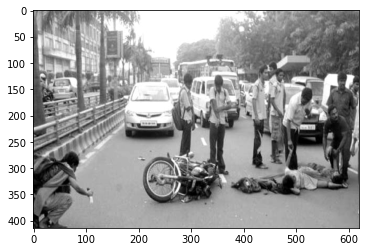

In [2]:
DATADIR = "D:/Baatu"

CATEGORIES = ["Accidents", "Blood shed","death","Ghost","kiss","scanity clad men","scanity clas women","sucide","violence","vulgar signs","Weapon and knife"]

for category in CATEGORIES:  
    path = os.path.join(DATADIR,category)  
    for img in os.listdir(path):  
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

[[126 134 135 ... 124 126 127]
 [134 139 142 ... 135 138 139]
 [138 141 145 ... 141 143 145]
 ...
 [ 28  46  40 ... 150 148 147]
 [ 48  63  51 ... 150 148 147]
 [ 47  55  44 ... 149 147 147]]
(414, 620)


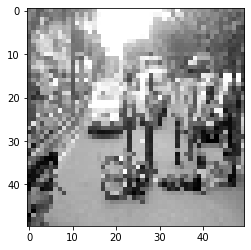

In [3]:
print(img_array)
print(img_array.shape)

IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

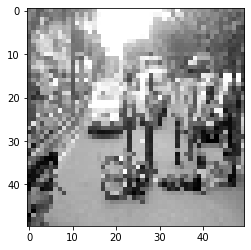

In [4]:
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [5]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:02<00:00, 95.89it/s]

1787


In [6]:
import random

random.shuffle(training_data)

for sample in training_data[:10]:
    print(sample[1])
    

X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

0
4
10
8
9
0
6
9
4
5
[[[[122]
   [ 89]
   [111]
   ...
   [127]
   [129]
   [132]]

  [[125]
   [108]
   [115]
   ...
   [123]
   [111]
   [110]]

  [[143]
   [199]
   [ 99]
   ...
   [133]
   [105]
   [107]]

  ...

  [[165]
   [157]
   [ 32]
   ...
   [159]
   [155]
   [150]]

  [[169]
   [165]
   [  5]
   ...
   [160]
   [153]
   [152]]

  [[152]
   [143]
   [100]
   ...
   [161]
   [158]
   [154]]]]


In [7]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()


pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)




In [8]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

import pickle

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0
y = np.array(y)

from keras.utils import to_categorical
y = to_categorical(y)

model = Sequential()

model.add(Conv2D(64, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) 

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) 

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(32))

model.add(Dense(11))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X, y, batch_size=5, epochs=10, validation_split=0.3)


C:\Users\nages\anaconda3\envs\tf-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\nages\anaconda3\envs\tf-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\nages\anaconda3\envs\tf-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\nages\anaconda3\envs\tf-gpu\lib\site-packages\tensorflow\pyth

Instructions for updating:
Colocations handled automatically by placer.


Using TensorFlow backend.


Train on 1250 samples, validate on 537 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
1250/1250 [==============================] - 3s 2ms/sample - loss: 2.1924 - acc: 0.2224 - val_loss: 2.1493 - val_acc: 0.2719
Epoch 2/10
1250/1250 [==============================] - 1s 844us/sample - loss: 1.9382 - acc: 0.3384 - val_loss: 2.0289 - val_acc: 0.2756
Epoch 3/10
1250/1250 [==============================] - 1s 841us/sample - loss: 1.7210 - acc: 0.4208 - val_loss: 1.8348 - val_acc: 0.3929
Epoch 4/10
1250/1250 [==============================] - 1s 854us/sample - loss: 1.5172 - acc: 0.4880 - val_loss: 1.6728 - val_acc: 0.4600
Epoch 5/10
1250/1250 [==============================] - 1s 857us/sample - loss: 1.2907 - acc: 0.5864 - val_loss: 1.7114 - val_acc: 0.4804
Epoch 6/10
1250/1250 [==============================] - 1s 848us/sample - loss: 1.0506 - acc: 0.6776 - val_loss: 1.5199 - val_acc: 0.5121
Epoch 7/10
1250/1250 [==============================] - 1s 850us/sample - loss:

In [9]:
from keras.models import model_from_json
import keras
#model.save_weights('Baatu.h5')
model.save("Baatu1.h5")

from tensorflow.keras.initializers import glorot_uniform

loaded_model = tf.keras.models.load_model("Baatu1.h5",custom_objects={'GlorotUniform': glorot_uniform()})
print("loaded")


loaded


In [10]:
model_json=model.to_json()
with open('Baatu.h5','w') as json_file:
    json_file.write(model_json)
print('model saved')

model saved


In [14]:
import cv2
import tensorflow as tf

CATEGORIES = ["Accidents", "Blood shed","death","Ghost","kiss","scanity clad men","scanity clas women","sucide","violence","vulgar signs","Weapon and knife"]

data = {"Accidents":0, 'Blood shed':1,'death':2, 'Ghost':3, 'kiss':4, 'scanity clad men':5, 'scanity clas women':6, 'sucide':7, 'violence':8, 'vulgar signs':9, 'Weapon and knife':10}


def prepare(filepath):
    IMG_SIZE = 50  # 50 in txt-based
    img_array = cv2.imread('C:/Users/nages/Ghost (34).jpg', cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)




#prediction = model.predict_classes([prepare('C:/Users/nages/Ghost (34).jpg')])
prediction = loaded_model.predict_classes([prepare('4.jpg')])
print(prediction)  # will be a list in a list.
#print(CATEGORIES[int(prediction[0][0])])


if (prediction == 0):
    print('Accidents')
elif(prediction == 1):
    print('Blood shed')
elif(prediction == 2):
    print('death')
elif(prediction == 3):
    print('Ghost')
elif(prediction == 4):
    print('kiss')
elif(prediction == 5):
    print('scanity clad men')
elif(prediction == 6):
    print('scanity clas women')
elif(prediction == 7):
    print('sucide')
elif(prediction == 8):
    print('violence')
elif(prediction == 9):
    print('vulgar signs')
elif(prediction == 10):
    print('weapon')

[3]
Ghost
